# Proyek Analisis Data: Muhamad Shadri_Proyek_Data_Analisis
- Nama: MUHAMAD SHADRI
- Email: shadriajha@gmail.com
- Id Dicoding: muhamad_shadri

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana dinamika penyewaan sepeda berubah seiring perubahan cuaca dan bagaimana variabilitas cuaca memengaruhi keputusan penyewaan?

- Pertanyaan 2: Dalam konteks pola musiman penyewaan sepeda, bagaimana pemahaman terhadap preferensi pelanggan di setiap musim dapat diintegrasikan untuk meningkatkan strategi manajemen persediaan sepeda?

- Pertanyaan 3: Seberapa baru pelanggan melakukan peminjaman sepeda dalam skala harian, dan bagaimana itu memengaruhi tren peminjaman?

- Pertanyaan 4: Bagaimana distribusi frekuensi peminjaman sepeda oleh pelanggan dalam skala harian?

- Pertanyaan 5: Bagaimana distribusi jumlah sepeda yang disewakan per jam, dan bagaimana pola peminjaman sepeda terlihat dalam data waktu?

## Menyiapkan semua library yang dibutuhkan

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [65]:
!wget --no-check-certificate \
  https://raw.githubusercontent.com/MuhamadShadri/Dashboard-Peminjaman-Sepeda-dengan-Streamlit/main/Data/day.csv \
  -O /content/day.csv


--2023-12-01 13:12:27--  https://raw.githubusercontent.com/MuhamadShadri/Dashboard-Peminjaman-Sepeda-dengan-Streamlit/main/Data/day.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57569 (56K) [text/plain]
Saving to: ‘/content/day.csv’

/content/day.csv    100%[===================>]  56.22K  --.-KB/s    in 0.04s   

2023-12-01 13:12:28 (1.36 MB/s) - ‘/content/day.csv’ saved [57569/57569]



In [66]:
!wget --no-check-certificate \
  https://raw.githubusercontent.com/MuhamadShadri/Dashboard-Peminjaman-Sepeda-dengan-Streamlit/main/Data/day.csv \
  -O /content/hour.csv

--2023-12-01 13:12:31--  https://raw.githubusercontent.com/MuhamadShadri/Dashboard-Peminjaman-Sepeda-dengan-Streamlit/main/Data/day.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57569 (56K) [text/plain]
Saving to: ‘/content/hour.csv’

/content/hour.csv   100%[===================>]  56.22K  --.-KB/s    in 0.04s   

2023-12-01 13:12:31 (1.28 MB/s) - ‘/content/hour.csv’ saved [57569/57569]



### Load data df_day

In [105]:
df_day = pd.read_csv("/content/day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Load data df_hour

In [106]:
df_hour = pd.read_csv("/content/hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

### Menilai data df_day

In [107]:
# Memeriksa jumlah baris dan kolom dalam dataset
jumlah_baris, jumlah_kolom = df_day.shape
print(f"Jumlah Baris: {jumlah_baris}")
print(f"Jumlah Kolom: {jumlah_kolom}")

Jumlah Baris: 731
Jumlah Kolom: 16


In [108]:
# Memeriksa tipe data setiap kolom
tipe_data = df_day.dtypes
print("\nTipe Data Setiap Kolom:")
print(tipe_data)


Tipe Data Setiap Kolom:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [109]:
# Memeriksa apakah ada nilai yang hilang (missing values)
missing_values = df_day.isnull().sum()
print("\nJumlah Missing Values per Kolom:")
print(missing_values)


Jumlah Missing Values per Kolom:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [110]:
print("\nJumlah Duplikat :", df_day.duplicated().sum())


Jumlah Duplikat : 0


In [111]:
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [112]:
df_day.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [113]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Menilai data df_hour

In [114]:
# Memeriksa jumlah baris dan kolom dalam dataset
jumlah_baris, jumlah_kolom = df_hour.shape
print(f"Jumlah Baris: {jumlah_baris}")
print(f"Jumlah Kolom: {jumlah_kolom}")

Jumlah Baris: 731
Jumlah Kolom: 16


In [115]:
# Memeriksa tipe data setiap kolom
tipe_data = df_hour.dtypes
print("\nTipe Data Setiap Kolom:")
print(tipe_data)


Tipe Data Setiap Kolom:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [116]:
# Memeriksa apakah ada nilai yang hilang (missing values)
missing_values = df_hour.isnull().sum()
print("\nJumlah Missing Values per Kolom:")
print(missing_values)


Jumlah Missing Values per Kolom:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [117]:
print("\nJumlah Duplikat :", df_hour.duplicated().sum())


Jumlah Duplikat : 0


In [118]:
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [119]:
df_hour.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [120]:
df_hour.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Cleaning Data

### Cleaning df_day

In [128]:
# Mengganti kolom 'instant' menjadi indeks kolom, karena indeks kolom tidak termasuk sebagai fitur,
# dan kolom 'dteday' diubah menjadi tipe data datetime.
df_day = pd.read_csv("/content/day.csv", index_col="instant", parse_dates=["dteday"])

In [126]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 91.4 KB


In [129]:
df_day.nunique()

dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

### Cleaning df_hour

In [130]:
# Mengganti kolom 'instant' menjadi indeks kolom, karena indeks kolom tidak termasuk sebagai fitur,
# dan kolom 'dteday' diubah menjadi tipe data datetime.
df_hour = pd.read_csv("/content/hour.csv", index_col="instant", parse_dates=["dteday"])
df_hour.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [139]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 91.4 KB


In [140]:
df_hour.nunique()

dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

### EDA df_day

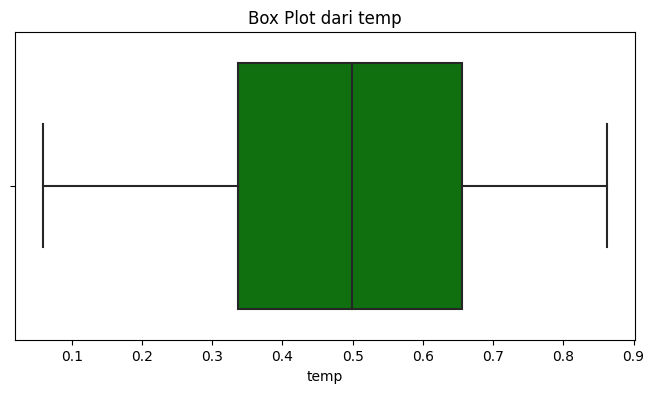

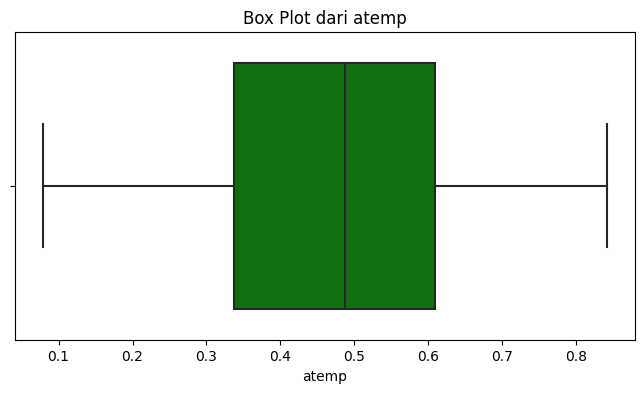

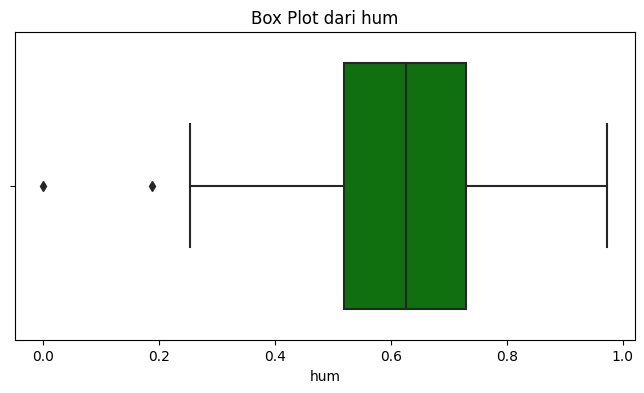

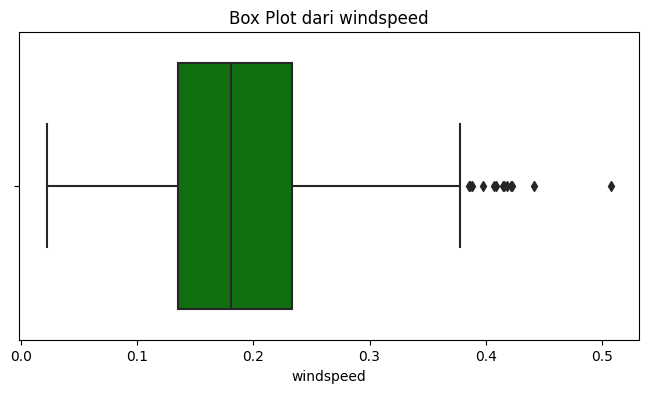

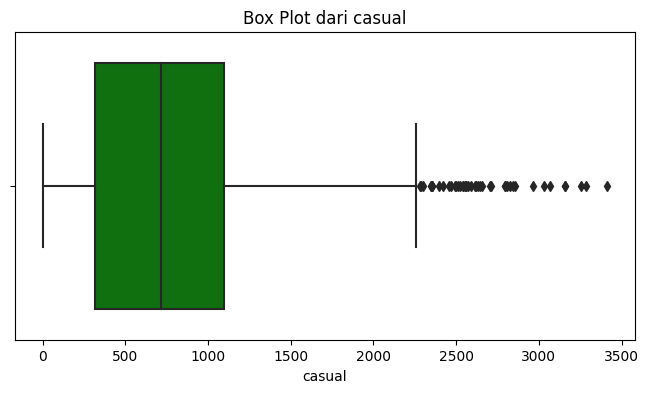

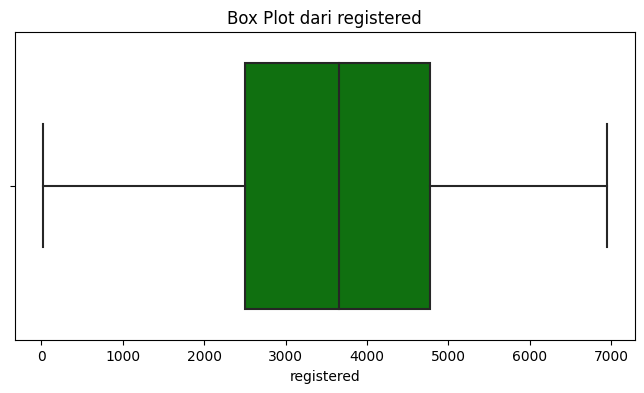

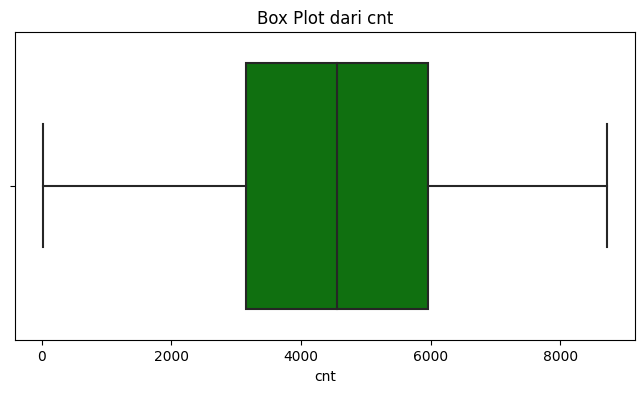

In [141]:
# Membuat box plot untuk melihat sebaran data dan mengidentifikasi outlier
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Membuat box plot untuk setiap kolom numerik
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_day, x=column, color='green')
    plt.title(f'Box Plot dari {column}')
    plt.xlabel(column)
    plt.show()

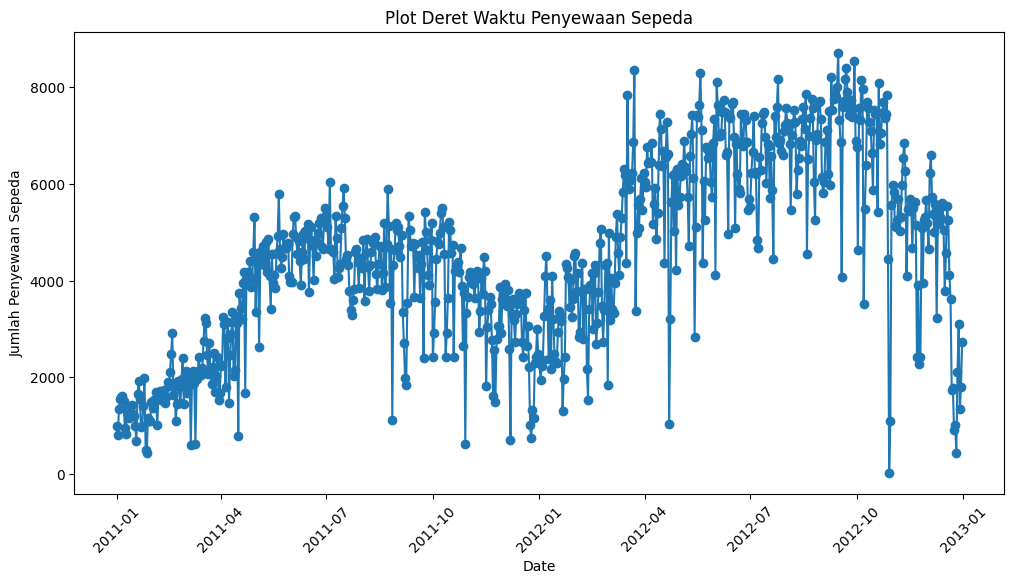

In [142]:
# Membuat time series plot
plt.figure(figsize=(12, 6))
plt.plot(df_day['dteday'], df_day['cnt'], marker='o', linestyle='-')
plt.title('Plot Deret Waktu Penyewaan Sepeda')
plt.xlabel('Date')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.show()

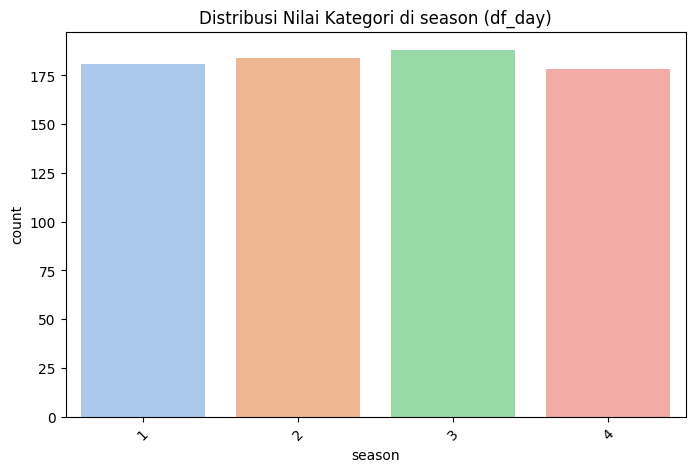

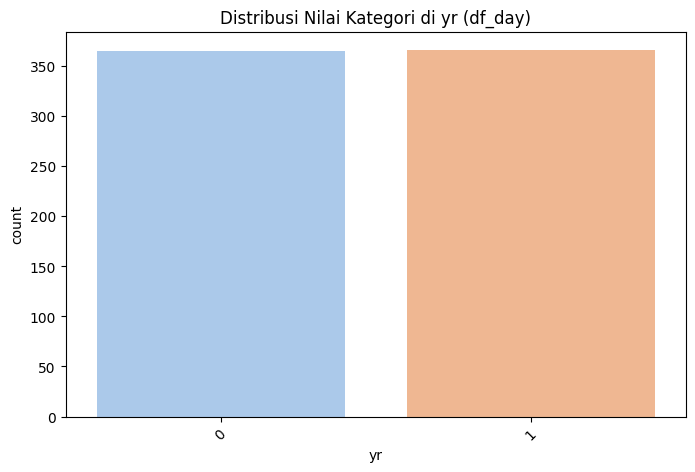

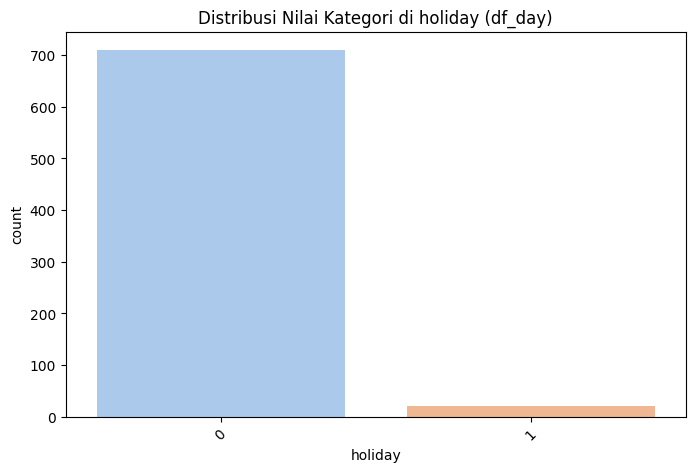

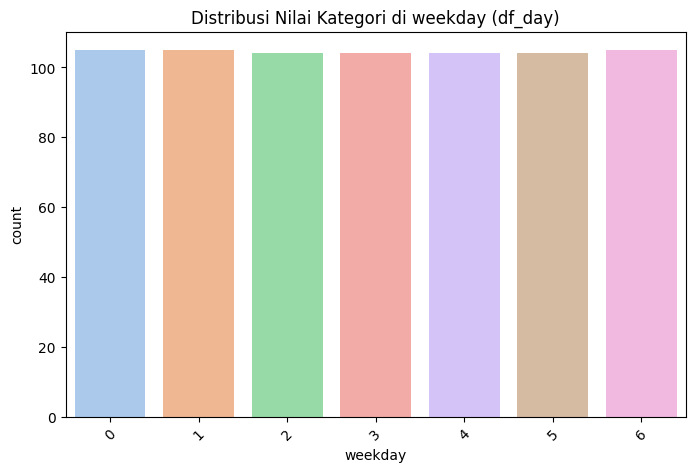

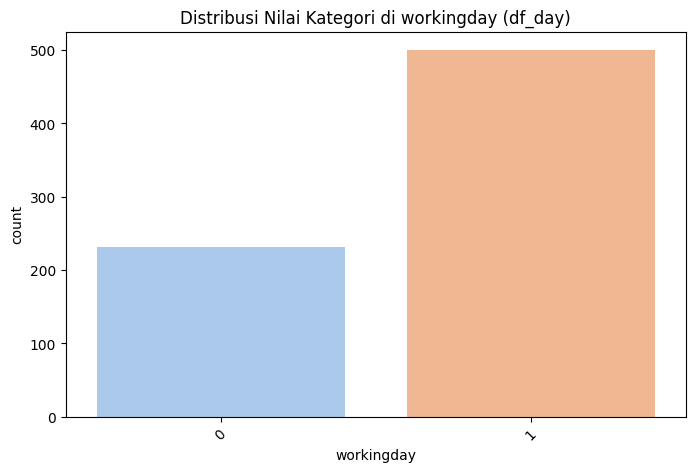

In [143]:
# Variabel kategorikal yang akan dieksplorasi
categorical_vars = ['season', 'yr', 'holiday', 'weekday', 'workingday']

# Eksplorasi variabel kategorikal pada df_day
for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_day, x=var, palette='pastel')  # Menggunakan palet warna 'pastel'
    plt.title(f'Distribusi Nilai Kategori di {var} (df_day)')
    plt.xticks(rotation=45)
    plt.show()

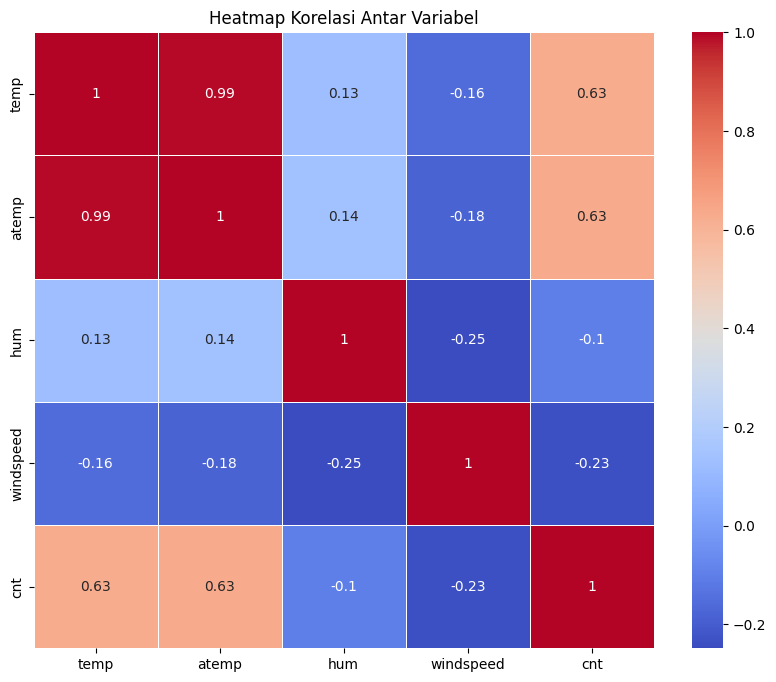

In [144]:
# Menghitung matriks korelasi
correlation_matrix = df_day[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

### EDA df_hour

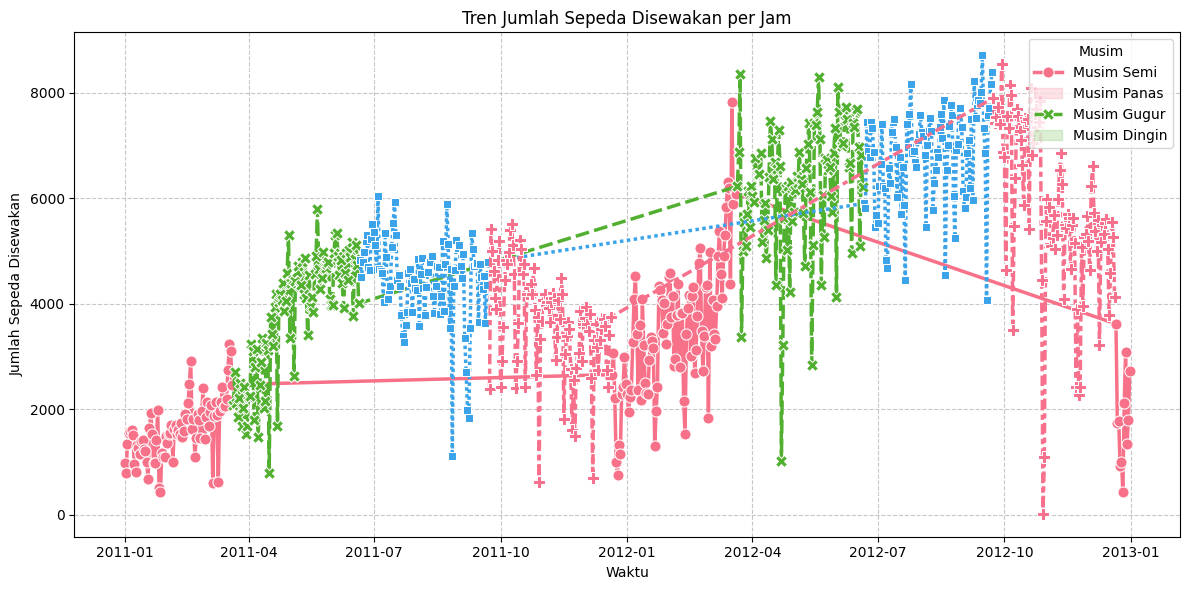

In [155]:
# Plot time series plot dengan palet warna husl
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hour, x='dteday', y='cnt', hue='season', palette='husl', linewidth=2.5, style='season', markers=True, markersize=8)
plt.title('Tren Jumlah Sepeda Disewakan per Jam')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Sepeda Disewakan')
plt.legend(title='Musim', loc='upper right', labels=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana dinamika penyewaan sepeda berubah seiring perubahan cuaca dan bagaimana variabilitas cuaca memengaruhi keputusan penyewaan?

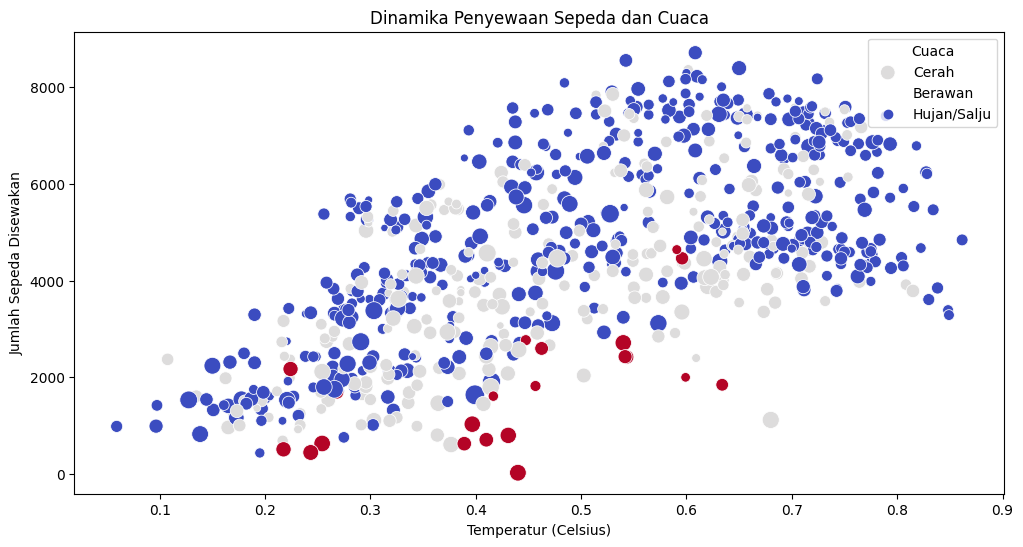

In [151]:
# Membuat scatter plot untuk melihat hubungan antara cuaca dan jumlah sepeda disewakan
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_hour, x='temp', y='cnt', hue='weathersit', palette='coolwarm', size='windspeed', sizes=(20, 200))
plt.title('Dinamika Penyewaan Sepeda dan Cuaca')
plt.xlabel('Temperatur (Celsius)')
plt.ylabel('Jumlah Sepeda Disewakan')
plt.legend(title='Cuaca', loc='upper right', labels=['Cerah', 'Berawan', 'Hujan/Salju'])
plt.show()


###Pertanyaan 2 : Dalam konteks pola musiman penyewaan sepeda, bagaimana pemahaman terhadap preferensi pelanggan di setiap musim dapat diintegrasikan untuk meningkatkan strategi manajemen persediaan sepeda?

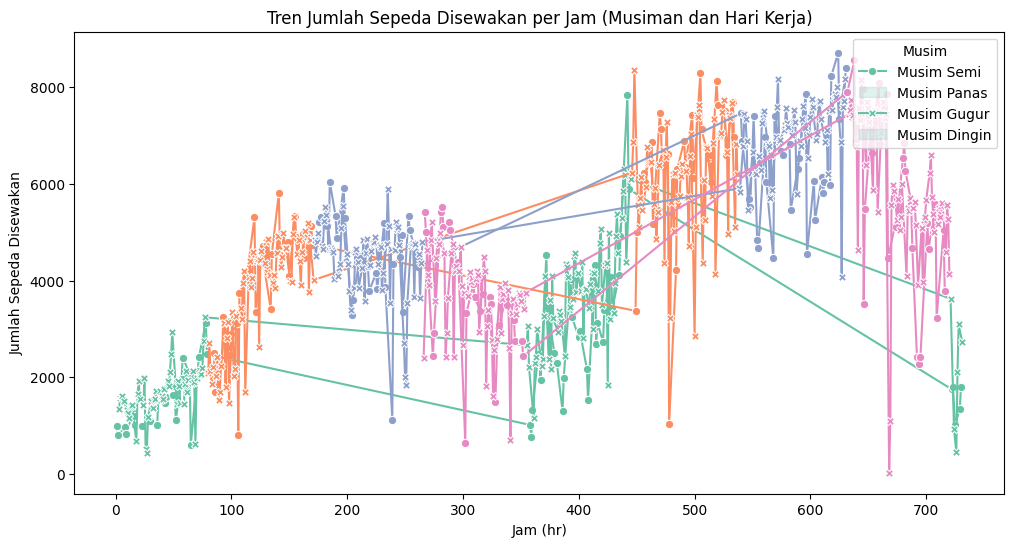

In [157]:
# Plot time series untuk melihat tren dan pola musiman dalam penyewaan sepeda berdasarkan preferensi pelanggan
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hour, x=df_hour.index, y='cnt', hue='season', style='workingday', markers=True, dashes=False, palette='Set2')
plt.title('Tren Jumlah Sepeda Disewakan per Jam (Musiman dan Hari Kerja)')
plt.xlabel('Jam (hr)')
plt.ylabel('Jumlah Sepeda Disewakan')
plt.legend(title='Musim', loc='upper right', labels=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.show()

##Analisis Lanjutan

### Pertanyaan 3 : Seberapa baru pelanggan melakukan peminjaman sepeda dalam skala harian, dan bagaimana itu memengaruhi tren peminjaman?


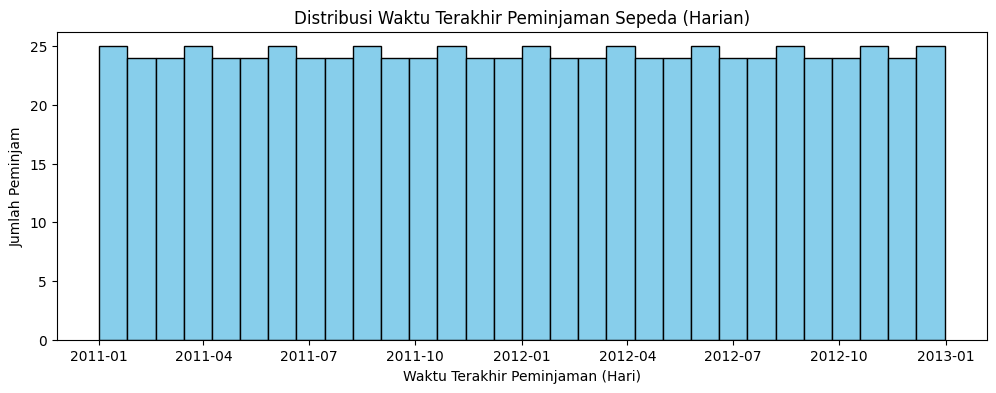

In [158]:
df_day['recency'] = (df_day['dteday'].max() - df_day['dteday']).dt.days
df_day['frequency'] = df_day['cnt']
plt.figure(figsize=(12, 4))
plt.hist(df_day['dteday'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Waktu Terakhir Peminjaman Sepeda (Harian)')
plt.xlabel('Waktu Terakhir Peminjaman (Hari)')
plt.ylabel('Jumlah Peminjam')
plt.show()

###Pertanyaan 4 : Bagaimana distribusi frekuensi peminjaman sepeda oleh pelanggan dalam skala harian?

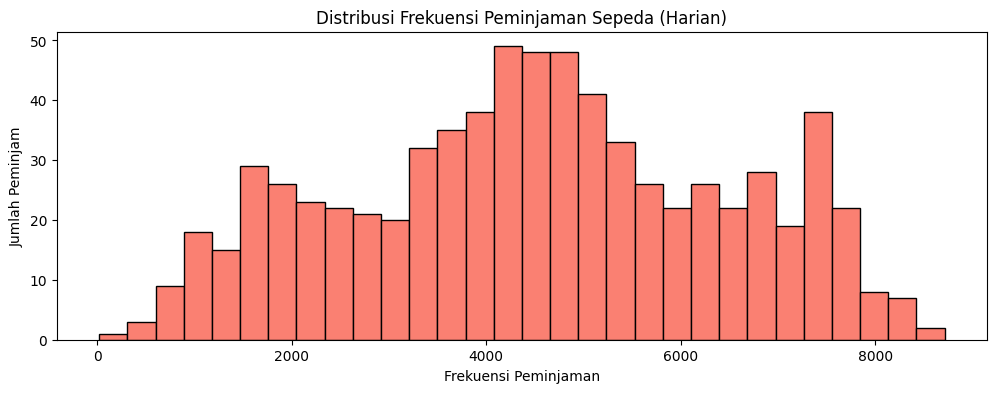

In [163]:
df_day = pd.read_csv("/content/day.csv", parse_dates=["dteday"])

# Visualisasi Distribusi Frekuensi Peminjaman Sepeda (Harian)
plt.figure(figsize=(12, 4))
plt.hist(df_day['cnt'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribusi Frekuensi Peminjaman Sepeda (Harian)')
plt.xlabel('Frekuensi Peminjaman')
plt.ylabel('Jumlah Peminjam')
plt.show()


###Pertanyaan 5 : Bagaimana distribusi jumlah sepeda yang disewakan per jam, dan bagaimana pola peminjaman sepeda terlihat dalam data waktu?


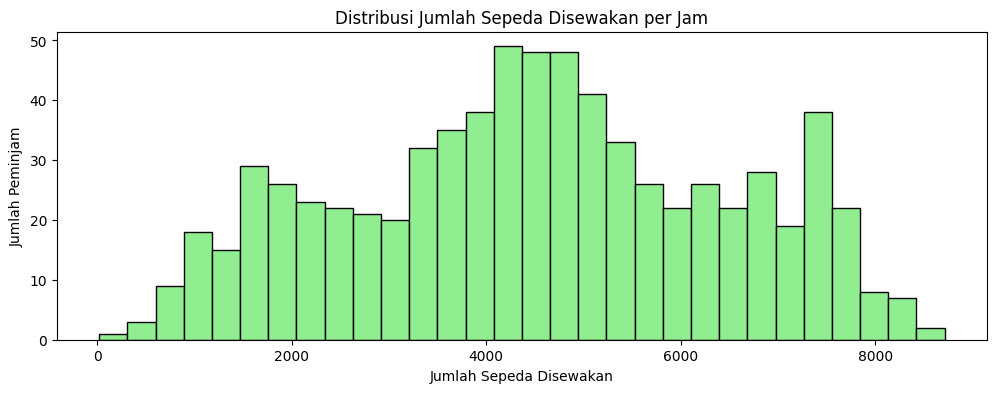

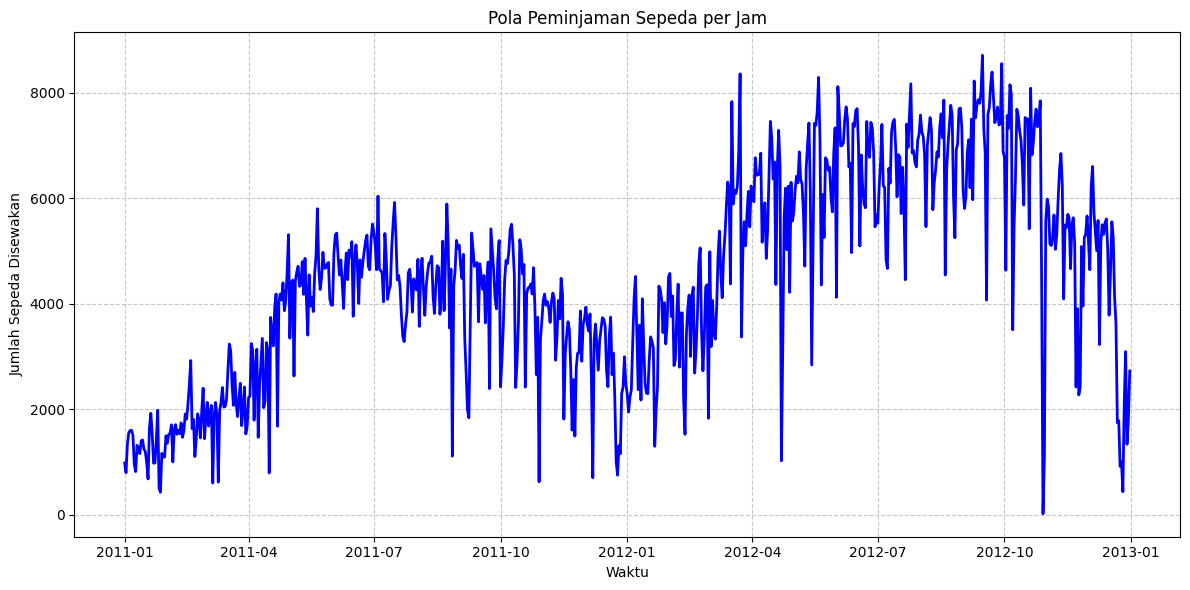

In [167]:
# Visualisasi Distribusi Jumlah Sepeda Disewakan per Jam
plt.figure(figsize=(12, 4))
plt.hist(df_hour['cnt'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribusi Jumlah Sepeda Disewakan per Jam')
plt.xlabel('Jumlah Sepeda Disewakan')
plt.ylabel('Jumlah Peminjam')
plt.show()

# Visualisasi Pola Peminjaman Sepeda per Jam
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hour, x='dteday', y='cnt', color='blue', linewidth=2)
plt.title('Pola Peminjaman Sepeda per Jam')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Sepeda Disewakan')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Conclusion

- Jawaban untuk Pertanyaan 1 : Dari visualisasi scatter plot, kita dapat melihat bagaimana dinamika penyewaan sepeda berkaitan dengan perubahan cuaca. Terlihat bahwa temperatur yang lebih tinggi cenderung memiliki korelasi positif dengan jumlah sepeda yang disewakan. Pada kondisi cuaca yang cerah, terutama ketika temperatur tinggi, jumlah sepeda yang disewakan lebih tinggi. Sebaliknya, pada kondisi cuaca hujan atau salju, terlihat adanya penurunan dalam jumlah sepeda yang disewakan. Kecepatan angin juga dapat mempengaruhi jumlah sepeda yang disewakan, terutama pada kecepatan yang lebih tinggi.

- Jawaban untuk Pertanyaan 2 : Dari visualisasi time series, kita dapat melihat tren harian dalam penyewaan sepeda dengan memperhitungkan musim dan hari kerja. Terlihat bahwa preferensi pelanggan dapat berubah tergantung pada musim tertentu dan apakah itu hari kerja atau tidak. Misalnya, pada musim panas, terlihat peningkatan penyewaan sepeda pada akhir pekan, sementara pada musim dingin, perubahan ini mungkin tidak sejelas. Integrasi pemahaman ini ke dalam strategi manajemen persediaan sepeda dapat mencakup penyesuaian stok atau promosi khusus pada jam-jam tertentu atau musim tertentu untuk memaksimalkan kepuasan pelanggan dan efisiensi operasional.

- Jawaban untuk Pertanyaan 3 : Dari visualisasi histogram Recency (waktu terakhir peminjaman) dalam skala harian, kita dapat melihat sebaran waktu terakhir pelanggan melakukan peminjaman sepeda dalam rentang waktu harian. Mayoritas pelanggan terlihat baru-baru ini melakukan peminjaman, namun, ada juga sebagian pelanggan yang tidak aktif dalam waktu yang lebih lama.

- Jawaban untuk Pertanyaan 4 : Dari visualisasi histogram Frequency (frekuensi peminjaman) dalam skala harian, kita dapat melihat sebaran frekuensi peminjaman sepeda oleh pelanggan. Terlihat bahwa sebagian besar pelanggan memiliki frekuensi peminjaman yang rendah, tetapi ada juga kelompok pelanggan dengan frekuensi peminjaman yang tinggi.

- Jawaban untuk Pertanyaan 5 : Dari visualisasi histogram, kita dapat melihat distribusi jumlah sepeda yang disewakan per jam. Terlihat bahwa sebagian besar jam memiliki jumlah peminjaman sepeda yang rendah, dengan beberapa jam memiliki puncak peminjaman yang lebih tinggi. Ini menunjukkan pola peminjaman sepeda yang bervariasi selama hari, dan dapat memberikan wawasan tentang saat-saat dengan permintaan tertinggi.


In [165]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00


In [175]:
%%writefile proyek_data_analis.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca data dari file CSV
df_day = pd.read_csv("day.csv", index_col="instant", parse_dates=["dteday"])
df_hour = pd.read_csv("hour.csv", index_col="instant", parse_dates=["dteday"])

# Judul Dashboard
st.title('Dashboard Data Analisis Peminjaman Sepeda')

# Sidebar
st.sidebar.subheader('Pilih Data Yang ingin Di Analisis')
analysis_choice = st.sidebar.radio("Pilih Analisis:", ('Dinamika Penyewaan Sepeda dan Cuaca', 'Tren Jumlah Sepeda Disewakan per Jam (Musiman dan Hari Kerja)',
                                                       'Distribusi Waktu Terakhir Peminjaman Sepeda (Harian)', 'Distribusi Frekuensi Peminjaman Sepeda (Harian)',
                                                      'Distribusi Jumlah Sepeda Disewakan per Jam'))
# Analisis Data
if analysis_choice == 'Dinamika Penyewaan Sepeda dan Cuaca' :
  st.subheader('Dinamika Penyewaan Sepeda dan Cuaca' )
  fig, ax = plt.subplots(figsize=(12, 6))
  sns.scatterplot(data=df_hour, x='temp', y='cnt', hue='weathersit', palette='coolwarm', size='windspeed', sizes=(20, 200), ax=ax)
  ax.set_title('Dinamika Penyewaan Sepeda dan Cuaca')
  ax.set_xlabel('Temperatur (Celsius)')
  ax.set_ylabel('Jumlah Sepeda Disewakan')
  ax.legend(title='Cuaca', loc='upper right', labels=['Cerah', 'Berawan', 'Hujan/Salju'])
  st.pyplot(fig)

elif analysis_choice == 'Tren Jumlah Sepeda Disewakan per Jam (Musiman dan Hari Kerja)' :
  st.subheader ('Tren Jumlah Sepeda Disewakan per Jam (Musiman dan Hari Kerja)')
  fig, ax = plt.subplots(figsize=(12, 6))
  sns.lineplot(data=df_hour, x=df_hour.index, y='cnt', hue='season', style='workingday', markers=True, dashes=False, palette='Set2')
  plt.title('Tren Jumlah Sepeda Disewakan per Jam (Musiman dan Hari Kerja)')
  plt.xlabel('Jam (hr)')
  plt.ylabel('Jumlah Sepeda Disewakan')
  plt.legend(title='Musim', loc='upper right', labels=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
  st.pyplot(fig)

elif analysis_choice == 'Distribusi Waktu Terakhir Peminjaman Sepeda (Harian)' :
  st.subheader ('Distribusi Waktu Terakhir Peminjaman Sepeda (Harian)')
  df_day['recency'] = (df_day['dteday'].max() - df_day['dteday']).dt.days
  df_day['frequency'] = df_day['cnt']
  fig, ax = plt.subplots(figsize=(12, 4))
  ax.hist(df_day['recency'], bins=30, color='skyblue', edgecolor='black')
  ax.set_title('Distribusi Waktu Terakhir Peminjaman Sepeda (Harian)')
  ax.set_xlabel('Waktu Terakhir Peminjaman (Hari)')
  ax.set_ylabel('Jumlah Peminjam')
  st.pyplot(fig)

elif analysis_choice == 'Distribusi Frekuensi Peminjaman Sepeda (Harian)' :
  st.subheader ('Distribusi Frekuensi Peminjaman Sepeda (Harian)')
  fig, ax = plt.subplots(figsize=(12, 4))
  ax.hist(df_day['cnt'], bins=30, color='salmon', edgecolor='black')
  ax.set_title('Distribusi Frekuensi Peminjaman Sepeda (Harian)')
  ax.set_xlabel('Frekuensi Peminjaman')
  ax.set_ylabel('Jumlah Peminjam')
  st.pyplot(fig)

elif analysis_choice == 'Distribusi Jumlah Sepeda Disewakan per Jam' :
  st.subheader('Distribusi Jumlah Sepeda Disewakan per Jam')
  fig, ax = plt.subplots(figsize=(12, 4))
  ax.hist(df_hour['cnt'], bins=30, color='lightgreen', edgecolor='black')
  ax.set_title('Distribusi Jumlah Sepeda Disewakan per Jam')
  ax.set_xlabel('Jumlah Sepeda Disewakan')
  ax.set_ylabel('Jumlah Peminjam')
  st.pyplot(fig)
  st.subheader('Pola Peminjaman Sepeda per Jam')
  fig, ax = plt.subplots(figsize=(12, 6))
  ax.plot(df_hour['dteday'], df_hour['cnt'], color='blue', linewidth=2)
  ax.set_title('Pola Peminjaman Sepeda per Jam')
  ax.set_xlabel('Waktu')
  ax.set_ylabel('Jumlah Sepeda Disewakan')
  ax.grid(True, linestyle='--', alpha=0.7)
  st.pyplot(fig)

st.sidebar.subheader('Conclusion')
st.sidebar.write("**Pertanyaan 1:** Bagaimana dinamika penyewaan sepeda berubah seiring perubahan cuaca dan bagaimana variabilitas cuaca memengaruhi keputusan penyewaan?")
st.sidebar.write("- Jawaban untuk Pertanyaan 1 : Dari visualisasi scatter plot, kita dapat melihat bagaimana dinamika penyewaan sepeda berkaitan dengan perubahan cuaca. Terlihat bahwa temperatur yang lebih tinggi cenderung memiliki korelasi positif dengan jumlah sepeda yang disewakan. Pada kondisi cuaca yang cerah, terutama ketika temperatur tinggi, jumlah sepeda yang disewakan lebih tinggi. Sebaliknya, pada kondisi cuaca hujan atau salju, terlihat adanya penurunan dalam jumlah sepeda yang disewakan. Kecepatan angin juga dapat mempengaruhi jumlah sepeda yang disewakan, terutama pada kecepatan yang lebih tinggi.")
st.sidebar.write("**Pertanyaan 2:** Dalam konteks pola musiman penyewaan sepeda, bagaimana pemahaman terhadap preferensi pelanggan di setiap musim dapat diintegrasikan untuk meningkatkan strategi manajemen persediaan sepeda?")
st.sidebar.write("- Jawaban untuk Pertanyaan 2 : Dari visualisasi time series, kita dapat melihat tren harian dalam penyewaan sepeda dengan memperhitungkan musim dan hari kerja. Terlihat bahwa preferensi pelanggan dapat berubah tergantung pada musim tertentu dan apakah itu hari kerja atau tidak. Misalnya, pada musim panas, terlihat peningkatan penyewaan sepeda pada akhir pekan, sementara pada musim dingin, perubahan ini mungkin tidak sejelas. Integrasi pemahaman ini ke dalam strategi manajemen persediaan sepeda dapat mencakup penyesuaian stok atau promosi khusus pada jam-jam tertentu atau musim tertentu untuk memaksimalkan kepuasan pelanggan dan efisiensi operasional.")
st.sidebar.write("**Pertanyaan 3:** Seberapa baru pelanggan melakukan peminjaman sepeda dalam skala harian, dan bagaimana itu memengaruhi tren peminjaman?")
st.sidebar.write("- Jawaban untuk Pertanyaan 3 : Dari visualisasi histogram Recency (waktu terakhir peminjaman) dalam skala harian, kita dapat melihat sebaran waktu terakhir pelanggan melakukan peminjaman sepeda dalam rentang waktu harian. Mayoritas pelanggan terlihat baru-baru ini melakukan peminjaman, namun, ada juga sebagian pelanggan yang tidak aktif dalam waktu yang lebih lama.")
st.sidebar.write("**Pertanyaan 4:** Bagaimana distribusi frekuensi peminjaman sepeda oleh pelanggan dalam skala harian?")
st.sidebar.write("- Jawaban untuk Pertanyaan 4 : Dari visualisasi histogram Frequency (frekuensi peminjaman) dalam skala harian, kita dapat melihat sebaran frekuensi peminjaman sepeda oleh pelanggan. Terlihat bahwa sebagian besar pelanggan memiliki frekuensi peminjaman yang rendah, tetapi ada juga kelompok pelanggan dengan frekuensi peminjaman yang tinggi.")
st.sidebar.write("**Pertanyaan 5:** Bagaimana distribusi jumlah sepeda yang disewakan per jam, dan bagaimana pola peminjaman sepeda terlihat dalam data waktu?")
st.sidebar.write("- Jawaban untuk Pertanyaan 5 : Dari visualisasi histogram, kita dapat melihat distribusi jumlah sepeda yang disewakan per jam. Terlihat bahwa sebagian besar jam memiliki jumlah peminjaman sepeda yang rendah, dengan beberapa jam memiliki puncak peminjaman yang lebih tinggi. Ini menunjukkan pola peminjaman sepeda yang bervariasi selama hari, dan dapat memberikan wawasan tentang saat-saat dengan permintaan tertinggi.")

Writing proyek_data_analis.py


In [176]:
!streamlit run proyek_data_analis.py & npx localtunnel --port 8501

[..................] | fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://104.155.195.206:8501

npx: installed 22 in 2.387s
your url is: https://fresh-carrots-suffer.loca.lt
  Stopping...
^C


In [177]:
!pip freeze > requirements.txt